In [189]:
# импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [146]:
# читаем текстовый файл с разделителем запятая
df = pd.read_csv('dataset.txt', sep=',')
df_outcomes = pd.read_csv('outcomes.txt', sep=',')

In [147]:
# выводим первые 5 строк DataFrame, чтобы посмотреть на данные
df.head()

,RecordID,Age,Gender,Height,ICUType,MeanAlbumin,MeanALP,MeanALT,MeanAST,MeanBilirubin,...,MeanSysABP,MeanTemp,MeanTroponinI,MeanTropI,MeanTroponinT,MeanTropT,MeanUrine,MeanWBC,MeanWeight,Unnamed: 44
0,66269.5,27.0,0.0,-0.50,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,37.357143,NaN,NaN,NaN,NaN,171.052632,10.300000,-1.000000,NaN
1,66270.0,38.0,0.5,87.65,1.0,NaN,NaN,NaN,NaN,NaN,...,113.411765,36.939130,NaN,NaN,NaN,NaN,151.560976,11.266667,80.670588,NaN
2,66270.5,22.0,0.0,-0.50,1.5,2.5,116.0,83.0,199.5,2.9,...,125.687500,37.800000,NaN,NaN,NaN,NaN,124.951220,4.700000,56.700000,NaN
3,66271.5,34.0,0.5,90.15,1.5,4.4,105.0,12.0,15.0,0.2,...,NaN,36.223077,NaN,NaN,NaN,NaN,545.833333,9.400000,84.600000,NaN
4,66272.5,44.0,0.0,-0.50,1.5,3.3,NaN,NaN,NaN,NaN,...,NaN,36.880000,NaN,NaN,NaN,NaN,62.131579,4.300000,-1.000000,NaN


In [148]:
# умножаем значения некоторых столбцах на 2, потому что в выданном датасете они зачем то были поделены на два
df[['RecordID', 'Age', 'Gender', 'Height', 'ICUType']] = df[['RecordID', 'Age', 'Gender', 'Height', 'ICUType']].apply(lambda x: x*2)

In [149]:
# переводим значения некоторых столбцов в целочисленные, потому что они должны быть такими изначально
df[['RecordID', 'Age', 'Gender', 'ICUType']] = df[['RecordID', 'Age', 'Gender', 'ICUType']].astype(int)

In [150]:
# смотрим количество пропусков в каждом столбце
df.isna().sum()

RecordID              0
Age                   0
Gender                0
Height                0
ICUType               0
MeanAlbumin        4754
MeanALP            4621
MeanALT            4544
MeanAST            4539
MeanBilirubin      4554
MeanBUN             120
MeanCholesterol    7352
MeanCreatinine      120
MeanDiasABP        2390
MeanFiO2           2581
MeanGCS             129
MeanGlucose         201
MeanHCO3            137
MeanHCT             124
MeanHR              128
MeanK               169
MeanLactate        3602
MeanMg              186
MeanMAP            2402
MeanMechVent       2960
MeanNa              138
MeanNIDiasABP       999
MeanNIMAP          1003
MeanNISysABP        973
MeanPaCO2          1965
MeanPAO2           1966
MeanPH             1929
MeanPlatelets       130
MeanRespRate       5772
MeanSaO2           4455
MeanSysABP         2390
MeanTemp            129
MeanTroponinI      7615
MeanTropI          7999
MeanTroponinT      6195
MeanTropT          8000
MeanUrine       

In [151]:
'''
удаляем строки, в которых меньше 6 непустых значений из 44, 
чтобы в датасете не осталось записей, не содержащих никакой информации, кроме общей
'''
df = df.dropna(thresh=6)
''' УДАЛЯЕМ СТОЛБЦЫ
'Unnamed: 44' - возник в результате подстановки в датасет запятой в конце каждой строки
'MeanTropT' - не содержит ни одной заполненной ячейки
'MeanTropI' - содержит 7999 пустых ячеек из 8000
'MeanTroponinI' - содержит 7615 пустых ячеек из 8000
'MeanCholesterol' - содержит 7352 пустые ячейки

удаление данных столбцов обусловлено тем, что они, на мой взгляд, бесполезны, так как практически не содержат данных, либо не содержат вообще
исключением является лишь столбец Unnamed: 44, который попал в набор данных случайно
'''
df = df.drop(['Unnamed: 44', 'MeanTropT', 'MeanTropI', 'MeanTroponinI', 'MeanCholesterol'], axis=1)

In [152]:
# ни одна строка не была удалена
# удалены 5 столбцов
df.shape

(8000, 40)

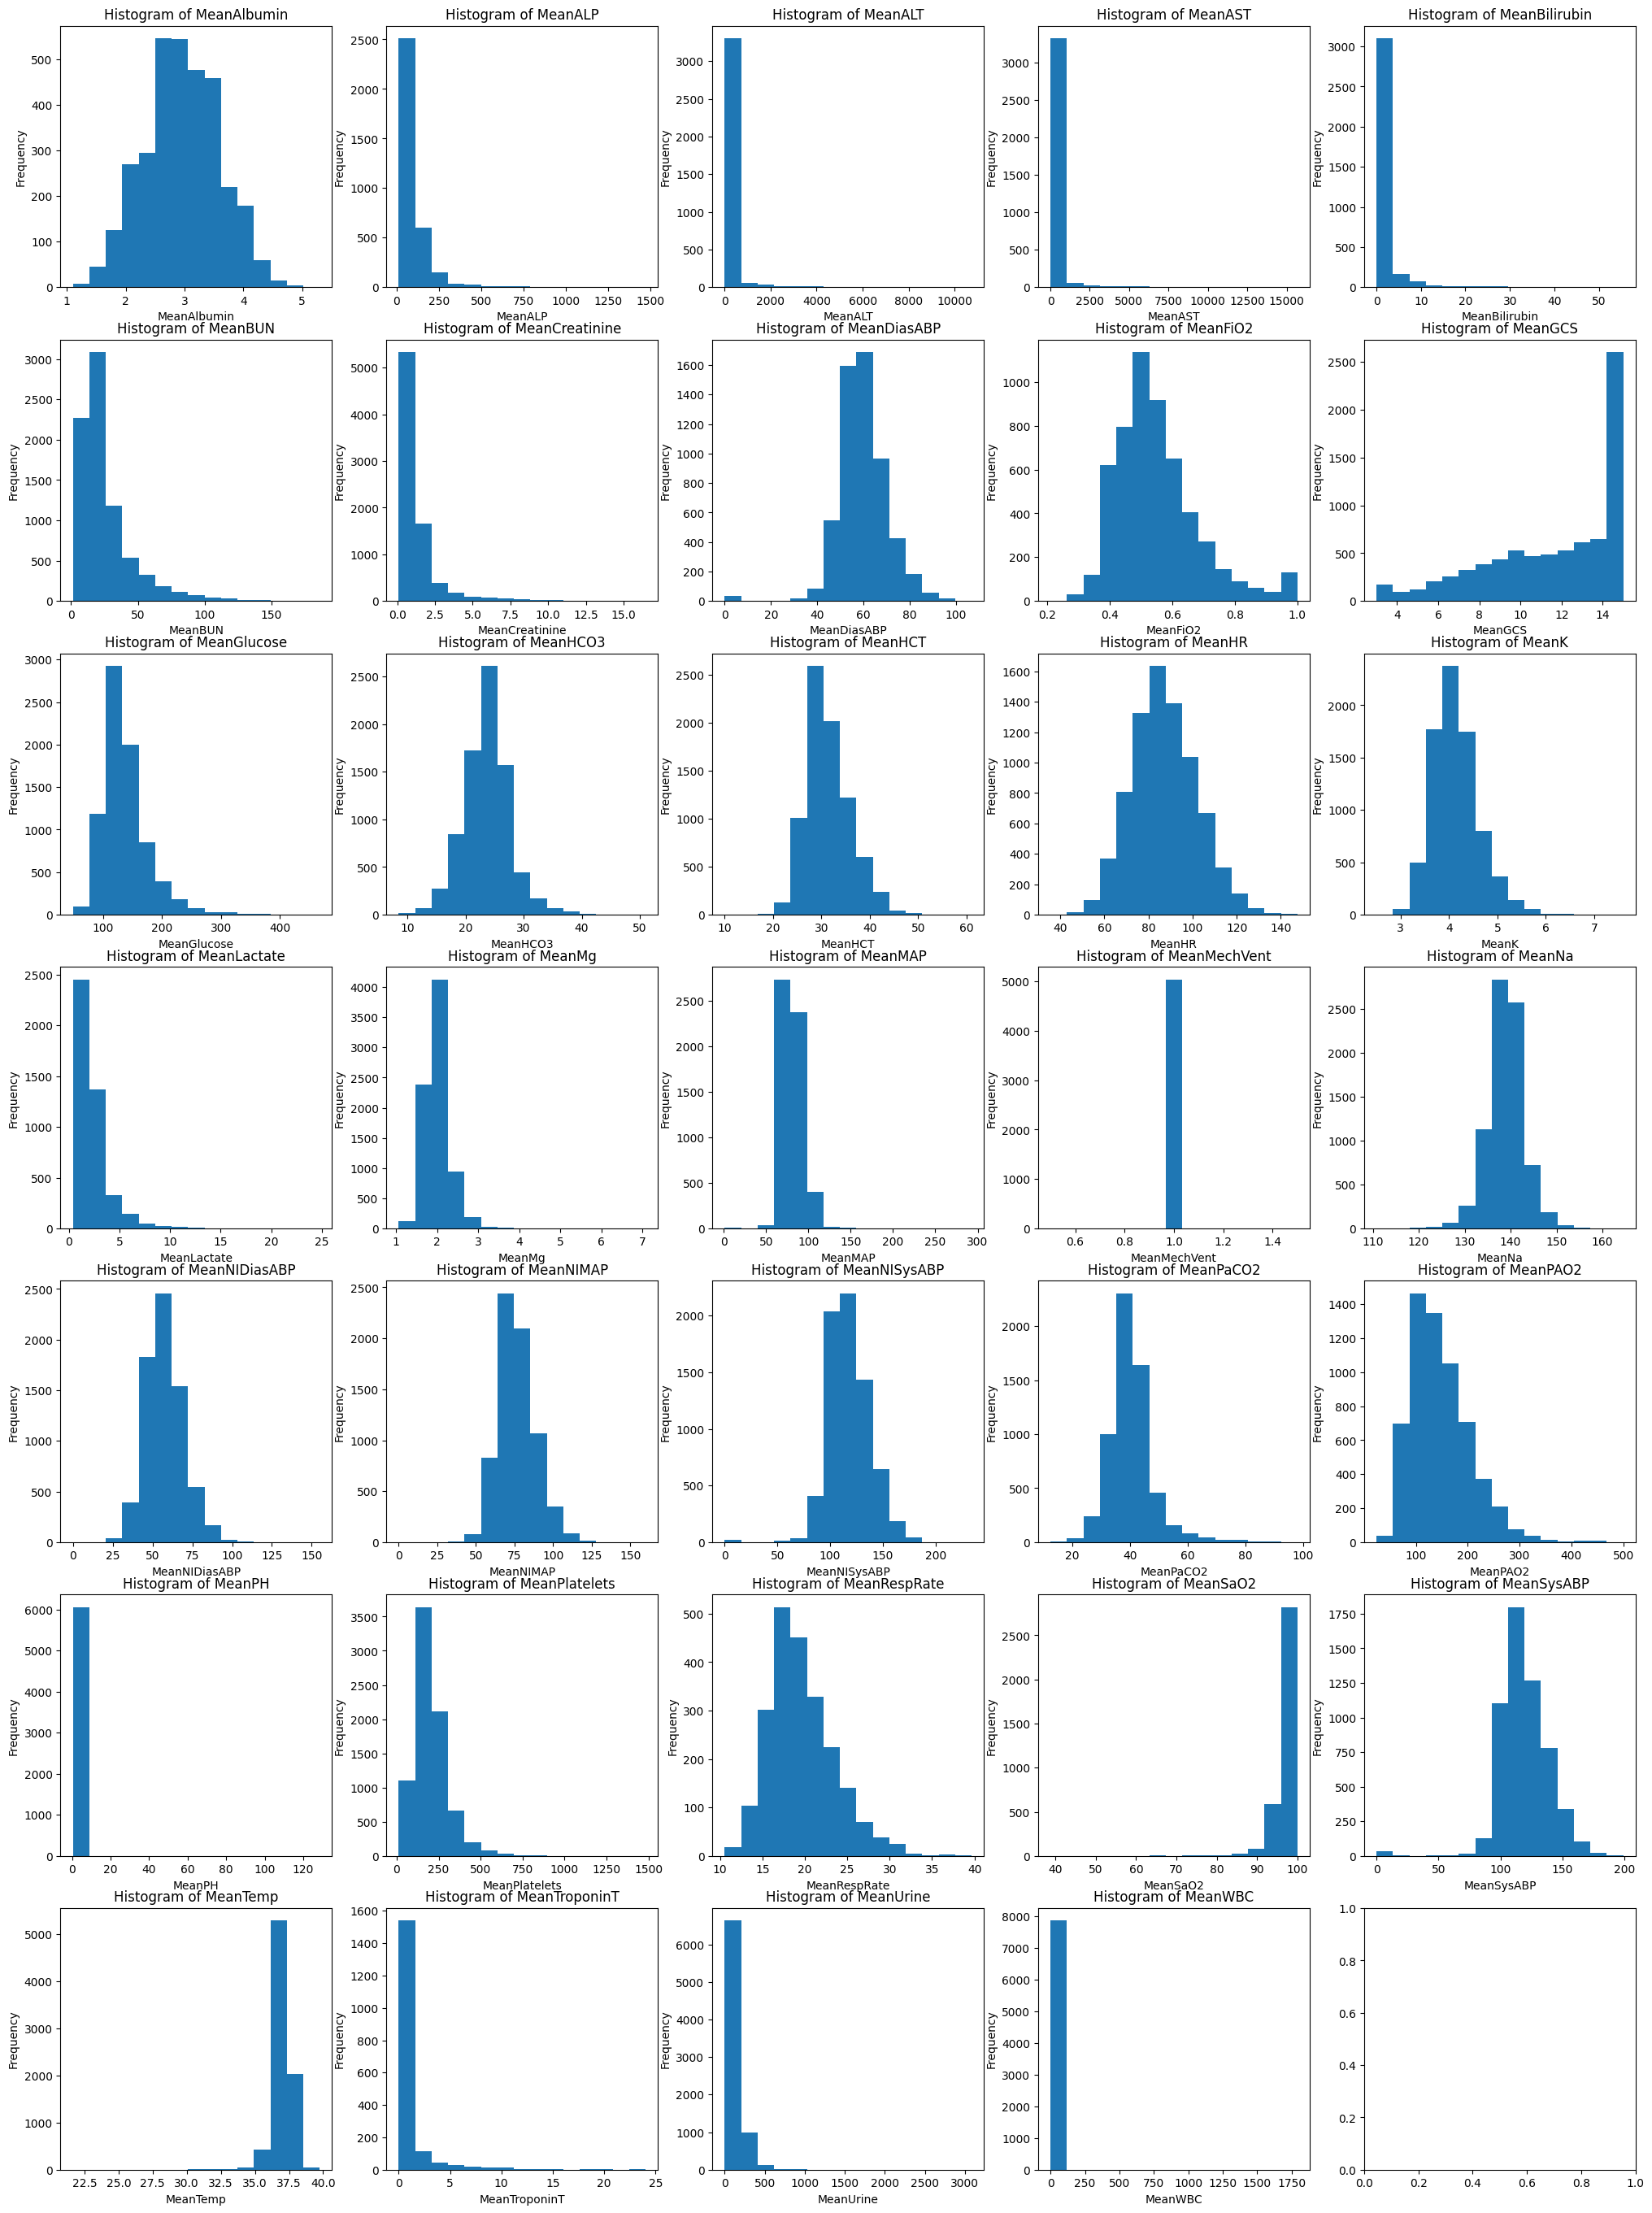

In [153]:
# делаем список из названий всех столбцов с параметрами измерений
# то есть со всеми, кроме тех, что содержат общую информацию
columns_list = df.columns[5:39].tolist()

# создаем поле с 7 рядами и 5 столбцами
fig, axs = plt.subplots(nrows=7, ncols=5, figsize=(25, 30))

# цикл for для перебора всех столбцов из списка columns_list
for i, column_name in enumerate(columns_list):
    # вычисляем индексы строки и столбца для текущего столбца
    row = i // 5  # определяем номер строки
    col = i % 5   # определяем номер столбца
    # строим гистограмму для текущего столбца
    axs[row, col].hist(df[column_name], bins=15)
    # задаем подпись оси x
    axs[row, col].set_xlabel(column_name)
    # задаем подпись оси y
    axs[row, col].set_ylabel('Frequency')
    # задаем заголовок гистограммы
    axs[row, col].set_title('Histogram of ' + column_name)

# увеличиваем расстояние под графиком, чтобы на них было удобно смотреть
plt.subplots_adjust(bottom=.001)
# отображаем гистограммы
plt.show()

In [154]:
# функция для замены nan значений на медиану
def fillna_median(df, columns_list_median):
    # цикл for для перебора всех столбцов из списка columns_list_median
    for column_name in columns_list_median:
        # вычисляем медианное значение для текущего столбца
        median_value = df[column_name].median()
        # заменяем nan значения в текущем столбце на медиану
        df[column_name] = df[column_name].fillna(median_value)
    # возвращаем измененный датасет
    return df

# функция для замены nan значений на среднее значение
def fillna_mean(df, columns_list_mean):
    # цикл for для перебора всех столбцов из списка columns_list_mean
    for column_name in columns_list_mean:
        # вычисляем среднее значение для текущего столбца
        mean_value = df[column_name].mean()
        # заменяем nan значения в текущем столбце на среднее значение
        df[column_name] = df[column_name].fillna(mean_value)
    # возвращаем измененный датасет
    return df

In [155]:
# убеждаемся, что пустых ячеек больше не осталось
df.isnull().sum()

RecordID             0
Age                  0
Gender               0
Height               0
ICUType              0
MeanAlbumin       4754
MeanALP           4621
MeanALT           4544
MeanAST           4539
MeanBilirubin     4554
MeanBUN            120
MeanCreatinine     120
MeanDiasABP       2390
MeanFiO2          2581
MeanGCS            129
MeanGlucose        201
MeanHCO3           137
MeanHCT            124
MeanHR             128
MeanK              169
MeanLactate       3602
MeanMg             186
MeanMAP           2402
MeanMechVent      2960
MeanNa             138
MeanNIDiasABP      999
MeanNIMAP         1003
MeanNISysABP       973
MeanPaCO2         1965
MeanPAO2          1966
MeanPH            1929
MeanPlatelets      130
MeanRespRate      5772
MeanSaO2          4455
MeanSysABP        2390
MeanTemp           129
MeanTroponinT     6195
MeanUrine          213
MeanWBC            139
MeanWeight           0
dtype: int64

In [156]:
'''
ниже приведены списки столбцов, в которых будет произведена замена на разные значения: медиану или среднее столбца
такое распределение обусловено следующим:
выше из графиков видно какие из столбцов имеют нормальное или близкое к нему распределение. именно в этих столбцах пустые ячейки будут заменены на медиану, так как это практически не повлияет на данные
в ином случае заменяем пустые значения на среднее.
'''
# создаем список столбцов, в которых нужно заменить пустые значения на медиану
columns_list_median = ['MeanAlbumin', 'MeanDiasABP', 'MeanFiO2', 'MeanGlucose', 'MeanHCO3', 
                'MeanHCT', 'MeanHR', 'MeanK', 'MeanNa', 'MeanNIDiasABP', 'MeanNIMAP', 
                'MeanNISysABP', 'MeanPaCO2', 'MeanRespRate']

# создаем список столбцов, в которых нужно заменить пустые значения на среднее
columns_list_mean = ['MeanALP', 'MeanALT', 'MeanAST', 'MeanBilirubin', 'MeanBUN', 
                    'MeanCreatinine', 'MeanGCS', 'MeanLactate', 'MeanMg', 'MeanMAP', 
                    'MeanPAO2', 'MeanPH', 'MeanPlatelets', 'MeanSaO2', 'MeanSysABP', 
                    'MeanTemp', 'MeanTroponinT', 'MeanUrine', 'MeanWBC']

# заменяем пропущенные значения в столбцах на медиану
df = fillna_median(df, columns_list_median)
# заменяем пропущенные значения в столбцах на среднее
df = fillna_mean(df, columns_list_mean)

In [157]:
# заменяем пустые значения в столбце 'MeanMechVent' на 0, так как это бинарный признак, обозначающий проведение искуственной вентилиции легких (1), либо ее отсутствие
# если в датасете указано только проведение данного процесса, то логично предположить, что под пустыми значениями подразумевается отсутствие проведения данного процесса
df['MeanMechVent'] = df['MeanMechVent'].fillna(0)

In [158]:
# убеждаемся, что в таблице не осталось пустых ячеек
df.isnull().sum()

RecordID          0
Age               0
Gender            0
Height            0
ICUType           0
MeanAlbumin       0
MeanALP           0
MeanALT           0
MeanAST           0
MeanBilirubin     0
MeanBUN           0
MeanCreatinine    0
MeanDiasABP       0
MeanFiO2          0
MeanGCS           0
MeanGlucose       0
MeanHCO3          0
MeanHCT           0
MeanHR            0
MeanK             0
MeanLactate       0
MeanMg            0
MeanMAP           0
MeanMechVent      0
MeanNa            0
MeanNIDiasABP     0
MeanNIMAP         0
MeanNISysABP      0
MeanPaCO2         0
MeanPAO2          0
MeanPH            0
MeanPlatelets     0
MeanRespRate      0
MeanSaO2          0
MeanSysABP        0
MeanTemp          0
MeanTroponinT     0
MeanUrine         0
MeanWBC           0
MeanWeight        0
dtype: int64

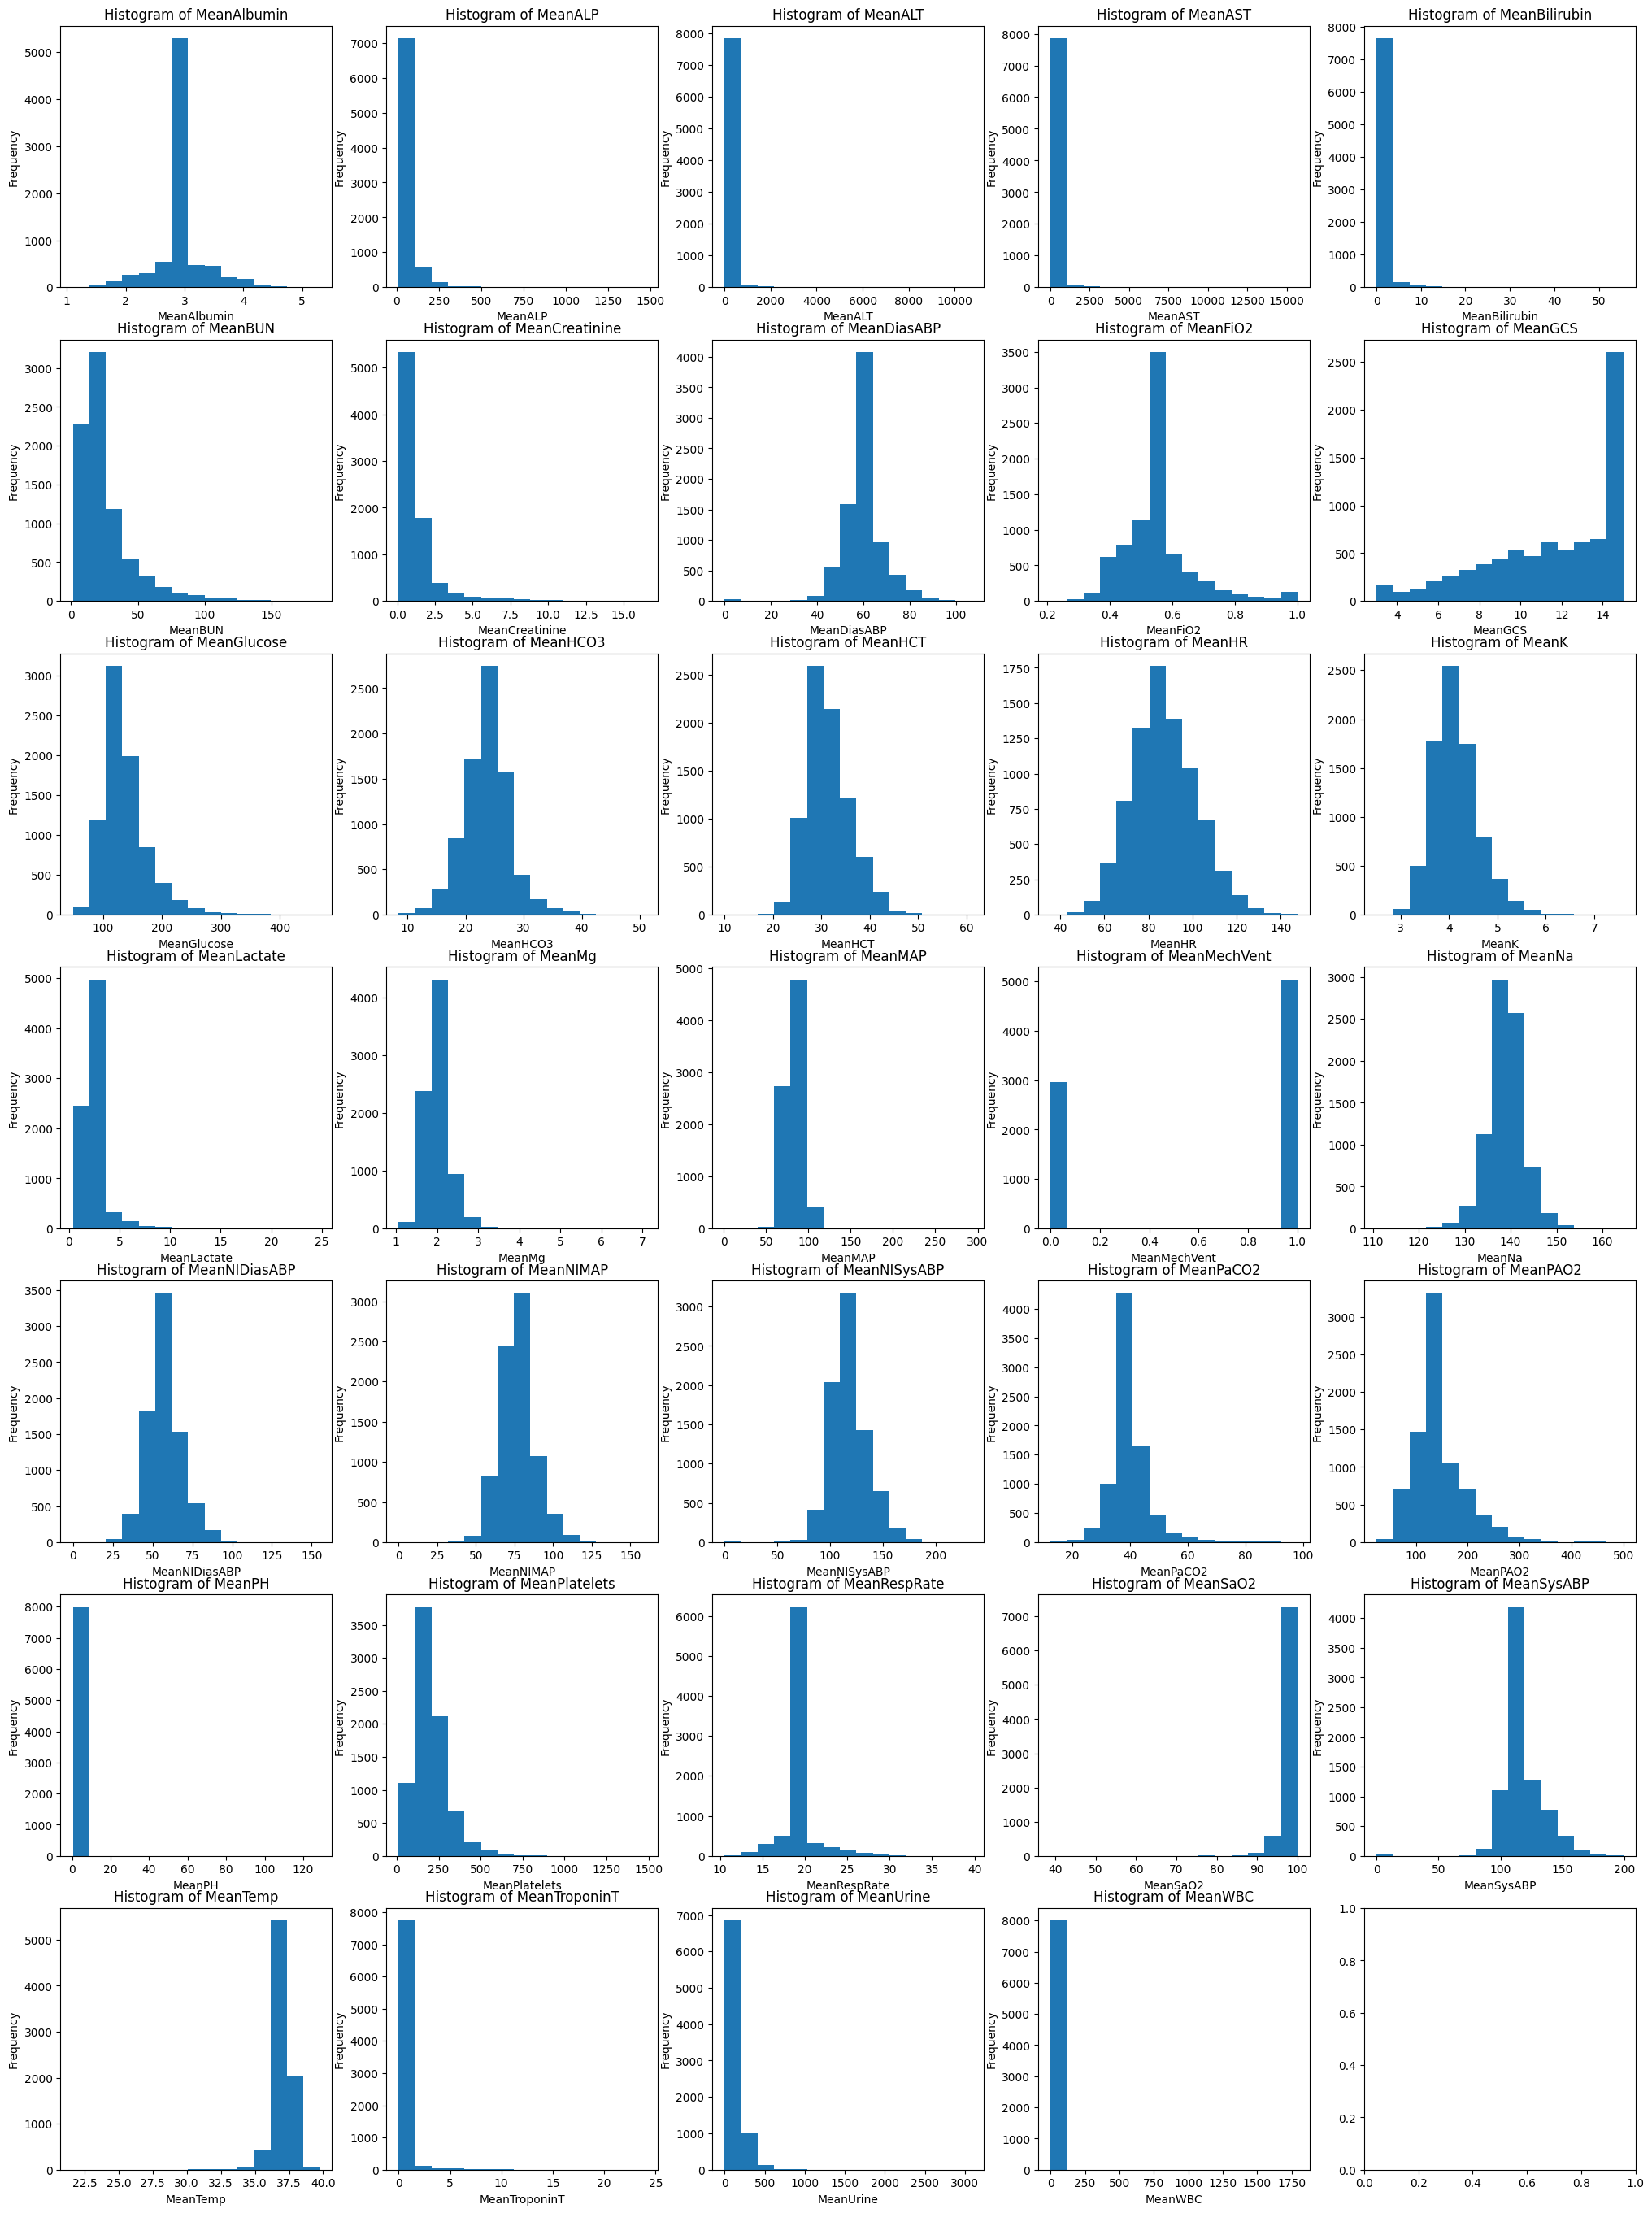

In [159]:
# делаем список из названий всех столбцов с параметрами измерений
# то есть со всеми, кроме тех, что содержат общую информацию
columns_list = df.columns[5:39].tolist()

# создаем поле с 7 рядами и 5 столбцами
fig, axs = plt.subplots(nrows=7, ncols=5, figsize=(25, 30))

# цикл for для перебора всех столбцов из списка columns_list
for i, column_name in enumerate(columns_list):
    # вычисляем индексы строки и столбца для текущего столбца
    row = i // 5  # определяем номер строки
    col = i % 5   # определяем номер столбца
    # строим гистограмму для текущего столбца
    axs[row, col].hist(df[column_name], bins=15)
    # задаем подпись оси x
    axs[row, col].set_xlabel(column_name)
    # задаем подпись оси y
    axs[row, col].set_ylabel('Frequency')
    # задаем заголовок гистограммы
    axs[row, col].set_title('Histogram of ' + column_name)

# увеличиваем расстояние под графиком, чтобы на них было удобно смотреть
plt.subplots_adjust(bottom=.001)
# отображаем гистограммы
plt.show()

Сравнив построения графиков до и после замены значений, можно сделать вывод:
замена произошла успешно и практически не повлияла на распределение данных, за исключением следующих столбцов: 'MeanAlbumin', 'MeanFiO2', 'MeanRespRate' и 'MeanSysABP'. Теперь на данных графиках ярко выражен их центр. 
Кроме того, на графике 'MeanMechVent' теперь есть два столбца данных.

In [160]:
def outliers_count(df, columns_list):
    for column in columns_list:
        # вычисляем интерквартильное расстояние
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # определяем выбросы
        outliers = df[(df[column] < Q1 - 1.5 * IQR) | (df[column] > Q3 + 1.5 * IQR)]

        # выводим количество выбросов
        print(f'Number of outliers in {column}:', len(outliers))

In [161]:
outliers_count(df, columns_list)

Number of outliers in MeanAlbumin: 3239
Number of outliers in MeanALP: 1522
Number of outliers in MeanALT: 250
Number of outliers in MeanAST: 260
Number of outliers in MeanBilirubin: 358
Number of outliers in MeanBUN: 652
Number of outliers in MeanCreatinine: 848
Number of outliers in MeanDiasABP: 886
Number of outliers in MeanFiO2: 1393
Number of outliers in MeanGCS: 0
Number of outliers in MeanGlucose: 367
Number of outliers in MeanHCO3: 253
Number of outliers in MeanHCT: 127
Number of outliers in MeanHR: 63
Number of outliers in MeanK: 182
Number of outliers in MeanLactate: 1081
Number of outliers in MeanMg: 329
Number of outliers in MeanMAP: 802
Number of outliers in MeanMechVent: 0
Number of outliers in MeanNa: 235
Number of outliers in MeanNIDiasABP: 259
Number of outliers in MeanNIMAP: 244
Number of outliers in MeanNISysABP: 228
Number of outliers in MeanPaCO2: 865
Number of outliers in MeanPAO2: 443
Number of outliers in MeanPH: 85
Number of outliers in MeanPlatelets: 319
Numbe

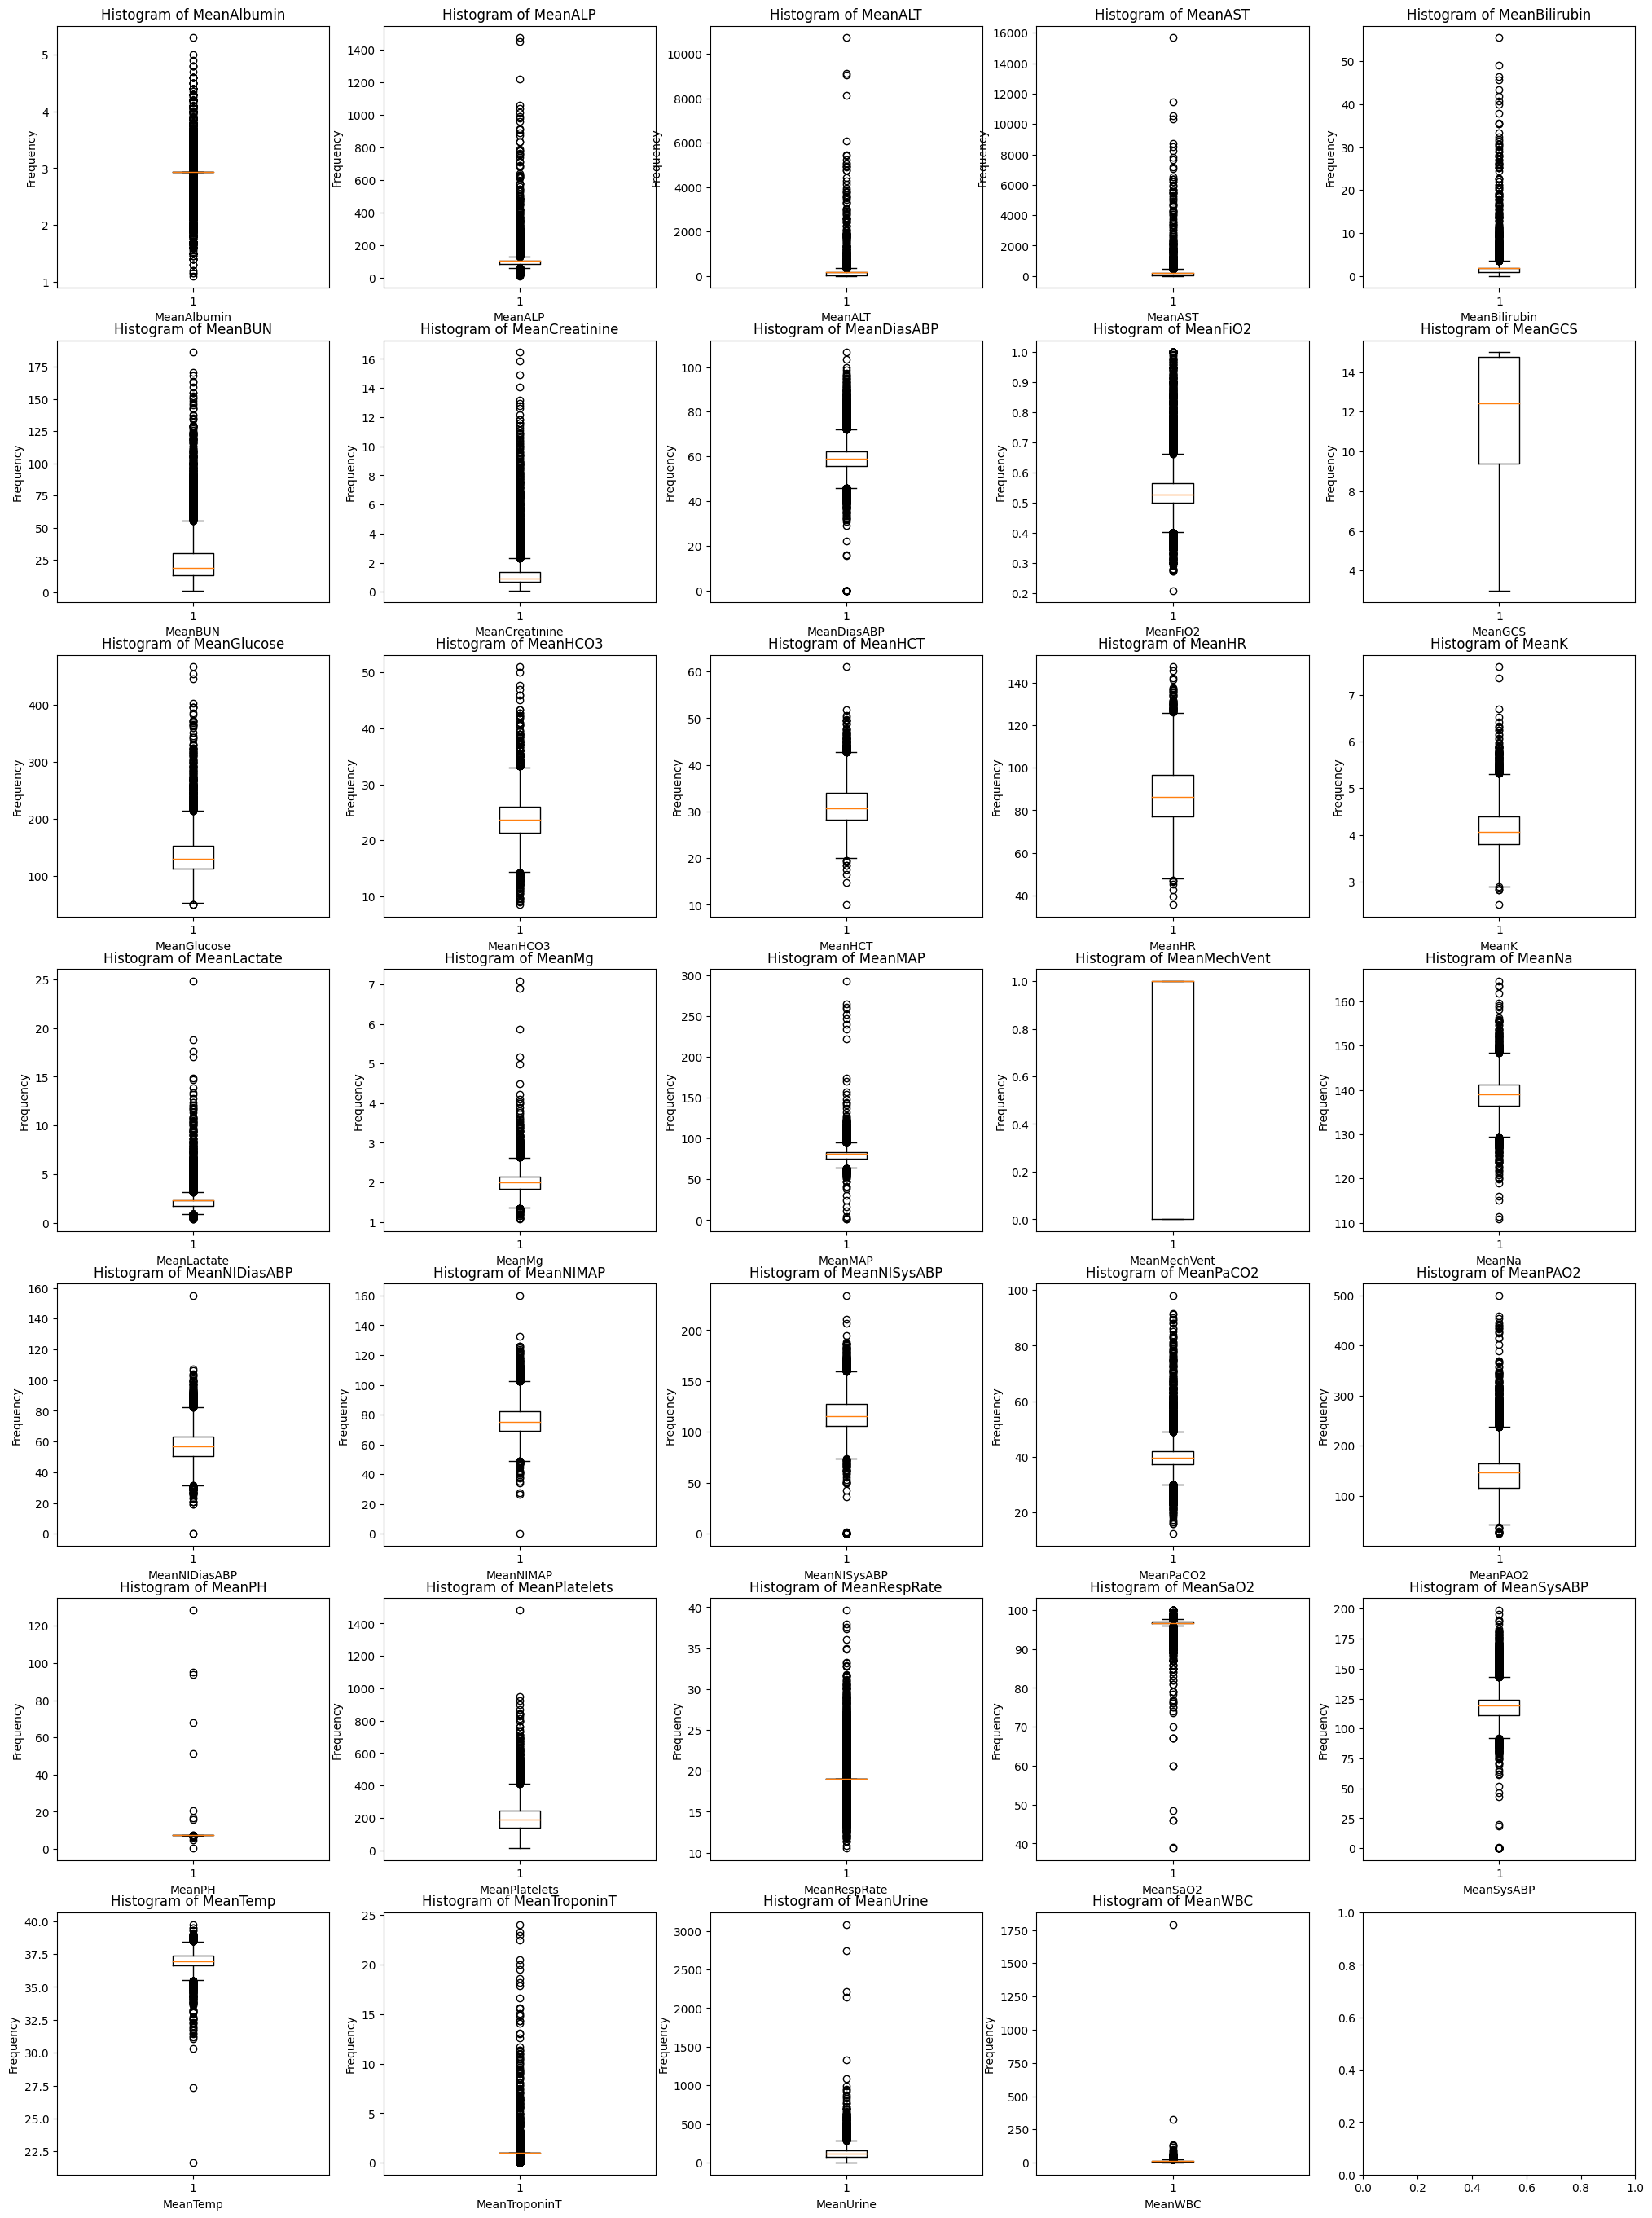

In [162]:
# делаем список из названий всех столбцов с параметрами измерений
# то есть со всеми, кроме тех, что содержат общую информацию
columns_list = df.columns[5:39].tolist()

# создаем поле с 7 рядами и 5 столбцами
fig, axs = plt.subplots(nrows=7, ncols=5, figsize=(25, 30))

# цикл for для перебора всех столбцов из списка columns_list
for i, column_name in enumerate(columns_list):
    # вычисляем индексы строки и столбца для текущего столбца
    row = i // 5  # определяем номер строки
    col = i % 5   # определяем номер столбца
    # строим гистограмму для текущего столбца
    axs[row, col].boxplot(df[column_name])
    # задаем подпись оси x
    axs[row, col].set_xlabel(column_name)
    # задаем подпись оси y
    axs[row, col].set_ylabel('Frequency')
    # задаем заголовок гистограммы
    axs[row, col].set_title('Histogram of ' + column_name)

# увеличиваем расстояние под графиком, чтобы на них было удобно смотреть
plt.subplots_adjust(bottom=.001)
# отображаем гистограммы
plt.show()

из графиков видно, что количество выбросов достаточно велико

In [163]:
full_df = pd.merge(df, df_outcomes, on='RecordID', how='outer')

In [164]:
full_df.head()

,RecordID,Age,Gender,Height,ICUType,MeanAlbumin,MeanALP,MeanALT,MeanAST,MeanBilirubin,...,MeanRespRate,MeanSaO2,MeanSysABP,MeanTemp,MeanTroponinT,MeanUrine,MeanWBC,MeanWeight,Survival,In-hospital_death
0,132539,54,0,-1.0,4,2.933333,105.159711,161.229856,228.553798,1.885847,...,17.428571,96.558512,119.096129,37.357143,1.017012,171.052632,10.300000,-1.000000,-1,0
1,132540,76,1,175.3,2,2.933333,105.159711,161.229856,228.553798,1.885847,...,19.018387,96.833333,113.411765,36.939130,1.017012,151.560976,11.266667,80.670588,-1,0
2,132541,44,0,-1.0,3,2.500000,116.000000,83.000000,199.500000,2.900000,...,19.018387,95.000000,125.687500,37.800000,1.017012,124.951220,4.700000,56.700000,-1,0
3,132543,68,1,180.3,3,4.400000,105.000000,12.000000,15.000000,0.200000,...,15.457627,96.558512,119.096129,36.223077,1.017012,545.833333,9.400000,84.600000,575,0
4,132545,88,0,-1.0,3,3.300000,105.159711,161.229856,228.553798,1.885847,...,19.166667,96.558512,119.096129,36.880000,1.017012,62.131579,4.300000,-1.000000,918,0


In [165]:
full_df['Survival'].min()

-23

In [166]:
result = full_df[full_df['Survival'] == -23]
result

,RecordID,Age,Gender,Height,ICUType,MeanAlbumin,MeanALP,MeanALT,MeanAST,MeanBilirubin,...,MeanRespRate,MeanSaO2,MeanSysABP,MeanTemp,MeanTroponinT,MeanUrine,MeanWBC,MeanWeight,Survival,In-hospital_death
5384,146178,85,0,-1.0,3,2.933333,105.159711,161.229856,228.553798,0.8,...,19.018387,96.558512,81.166667,37.153333,1.017012,49.288889,11.45,43.3,-23,0


In [167]:
full_df.loc[full_df['Survival'] == -23, 'Survival'] = 23

In [168]:
full_df['Height'] = full_df['Height'].replace(-1, np.NaN)

mean = full_df['Height'].mean(skipna=True)

full_df['Height'] = full_df['Height'].fillna(mean)

In [169]:
full_df = full_df.applymap(lambda x: round(x, 1) if isinstance(x, float) else x)

In [170]:
full_df = full_df.drop('RecordID', axis=1)

In [171]:
max_value = full_df['Survival'].max()
full_df.loc[full_df['Survival'] == -1, 'Survival'] = max_value + 1

In [172]:
full_df['Survival'].unique()

array([2621,  575,  918, ..., 2210,  752,  334], dtype=int64)

In [174]:
# Выберем столбцы, которые не нужно масштабировать
columns_to_keep = ['Age', 'Gender', 'Height', 'ICUType', 'MeanWeight', 'Survival', 'In-hospital_death']

# Создаем объект StandardScaler
scaler = StandardScaler()

# Масштабируем данные
scaled_data = scaler.fit_transform(full_df.drop(columns=columns_to_keep))


In [182]:
X = full_df.drop('In-hospital_death', axis=1)
y = full_df['In-hospital_death']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [186]:
# создаем экземпляр модели
logreg = LogisticRegression(max_iter=6000)

# обучаем модель на тренировочных данных
logreg.fit(X_train, y_train)

# делаем предсказания на тестовых данных
y_pred = logreg.predict(X_test)

In [190]:


# задаем сетку параметров для перебора
param_grid = {
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4],
}

# создаем экземпляр модели решающего дерева
tree = DecisionTreeClassifier(random_state=42)

# создаем объект GridSearchCV
grid_search = GridSearchCV(tree, param_grid=param_grid, cv=5, n_jobs=-1)

# обучаем модель на тренировочном наборе данных
grid_search.fit(X_train, y_train)

# выводим наилучшие параметры и наилучший результат на кросс-валидации
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)


Best parameters: {'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best cross-validation score: 0.97359375


In [ ]:
from sklearn.linear_model import LogisticRegression

# Создаем экземпляр классификатора
lr = LogisticRegression(random_state=42)

# Обучаем модель на тренировочных данных
lr.fit(X_train, y_train)

# Получаем предсказания на тестовых данных
y_pred_lr = lr.predict(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Создаем экземпляр класса DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=42)
# Обучаем дерево решений на обучающем наборе
tree.fit(X_train, y_train)
# Прогнозируем значения целевой переменной для тестового набора
y_pred = tree.predict(X_test)

# Вычисляем точность модели
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [192]:
from sklearn.ensemble import RandomForestClassifier

# Создание экземпляра модели с заданными гиперпараметрами
rfc = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# Обучение модели на тренировочных данных
rfc.fit(X_train, y_train)

# Оценка качества модели на тестовых данных
accuracy = rfc.score(X_test, y_test)
print(f"Accuracy of random forest classifier: {accuracy:.3f}")


Accuracy of random forest classifier: 0.963


In [193]:
from sklearn.ensemble import GradientBoostingClassifier

# Создаем объект класса GradientBoostingClassifier
gb = GradientBoostingClassifier()

# Обучаем модель на тренировочных данных
gb.fit(X_train, y_train)

# Получаем прогнозы на тестовых данных
y_pred = gb.predict(X_test)

# Оцениваем точность модели на тестовых данных
accuracy = gb.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.9775
